In [ ]:

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm
import xgboost
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv('/content/traingbm1.csv')
df_train

,ID,date,visitNumber,Channel,Conversion
0,0,20170502,1,6,1
1,1,20170502,4,6,0
2,2,20170502,3,6,0
3,3,20170502,6,6,0
4,4,20170502,4,6,0
...,...,...,...,...,...
63074,63074,20170519,1,1,0
63075,63075,20170519,1,1,0
63076,63076,20170519,1,1,0
63077,63077,20170519,1,1,0


In [ ]:
var_columns = [c for c in df_train.columns if c not in ['ID','Conversion']]

X = df_train.loc[:, var_columns]
y = df_train.loc[:, 'Conversion']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((50463, 3), (12616, 3), (50463,), (12616,))

**Random Forest**

In [ ]:
import time
import sys
from functools import wraps


def show_time(func):
    """
    timer decorator
    """

    @wraps(func)
    def wrapper(*args, **kwargs):

        t0 = time.time()

        print(f'running {func.__name__}.. ', end='')
        sys.stdout.flush()

        v = func(*args, **kwargs)

        m, s = divmod(time.time() - t0, 60)

        st = 'elapsed time:'

        if m:
            st += ' ' + f'{m:.0f} min'
        if s:
            st += ' ' + f'{s:.3f} sec'

        print(st)

        return v

    return wrapper


In [ ]:
@show_time
def mod_rf():
  model_rf = RandomForestClassifier(class_weight='balanced',
                                  criterion='gini',
                                  max_depth=55,
                                  max_features='log2',
                                  min_samples_leaf=0.005,
                                  min_samples_split=0.005,
                                  n_estimators=190)

  model_rf.fit(X_train, y_train)
  return model_rf

model_rf = mod_rf()

running mod_rf.. elapsed time: 2.538 sec


**GBM**

In [ ]:
@show_time
def mod_gbm():
  model_gbm = GradientBoostingClassifier(n_estimators=5000,
                                        learning_rate=0.05,
                                        max_depth=3,
                                        subsample=0.5,
                                        validation_fraction=0.1,
                                        n_iter_no_change=20,
                                        max_features='log2',
                                        verbose=1)
  model_gbm.fit(X_train, y_train)
  return model_gbm

model_gbm = mod_gbm()

running mod_gbm..       Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1688           0.0012            1.36m
         2           0.1800           0.0011            1.44m
         3           0.1728           0.0008            1.43m
         4           0.1774           0.0007            1.43m
         5           0.1668           0.0007            1.49m
         6           0.1624           0.0007            1.56m
         7           0.1728           0.0006            1.53m
         8           0.1658           0.0006            1.51m
         9           0.1671           0.0005            1.50m
        10           0.1621           0.0003            1.55m
        20           0.1619           0.0002            1.48m
        30           0.1593           0.0001            1.44m
        40           0.1644          -0.0000            1.43m
        50           0.1638           0.0000            1.41m
        60           0.1623           0.0000       

**LightGBM**

In [ ]:
@show_time
def mod_lgbm():
  lgbm_train_data = lightgbm.Dataset(X_train, label=y_train)
  lgbm_valid_data = lightgbm.Dataset(X_valid, label=y_valid)

  parameters = {'objective': 'binary',
                'metric': 'auc',
                'is_unbalance': 'true',
                'boosting': 'gbdt',
                'num_leaves': 63,
                'feature_fraction': 0.5,
                'bagging_fraction': 0.5,
                'bagging_freq': 20,
                'learning_rate': 0.01,
                'verbose': 0
              }

  model_lgbm = lightgbm.train(parameters,
                              lgbm_train_data,
                              valid_sets=lgbm_valid_data,
                              num_boost_round=5000,
                              early_stopping_rounds=50)
  return model_lgbm

model_lgbm = mod_lgbm()

running mod_lgbm.. [1]	valid_0's auc: 0.67904
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.67904
[3]	valid_0's auc: 0.715175
[4]	valid_0's auc: 0.714724
[5]	valid_0's auc: 0.735734
[6]	valid_0's auc: 0.733767
[7]	valid_0's auc: 0.732086
[8]	valid_0's auc: 0.736614
[9]	valid_0's auc: 0.734848
[10]	valid_0's auc: 0.73398
[11]	valid_0's auc: 0.731738
[12]	valid_0's auc: 0.733529
[13]	valid_0's auc: 0.733813
[14]	valid_0's auc: 0.732846
[15]	valid_0's auc: 0.73456
[16]	valid_0's auc: 0.735023
[17]	valid_0's auc: 0.734321
[18]	valid_0's auc: 0.734724
[19]	valid_0's auc: 0.734231
[20]	valid_0's auc: 0.733632
[21]	valid_0's auc: 0.733921
[22]	valid_0's auc: 0.735003
[23]	valid_0's auc: 0.73496
[24]	valid_0's auc: 0.735739
[25]	valid_0's auc: 0.736574
[26]	valid_0's auc: 0.737037
[27]	valid_0's auc: 0.738536
[28]	valid_0's auc: 0.738906
[29]	valid_0's auc: 0.739221
[30]	valid_0's auc: 0.738929
[31]	valid_0's auc: 0.739563
[32]	valid_0's auc: 0.739862
[33]	

**XGBoost**

In [ ]:
@show_time
def mod_xgboost():
  model_xgboost = xgboost.XGBClassifier(learning_rate=0.05,
                                        max_depth=2,
                                        n_estimators=5000,
                                        subsample=0.5,
                                        colsample_bytree=0.25,
                                        eval_metric='auc',
                                        verbosity=0,
                                        use_label_encoder=False)

  eval_set = [(X_valid, y_valid)]

  model_xgboost.fit(X_train,
                    y_train,
                    early_stopping_rounds=20,
                    eval_set=eval_set,
                    verbose=False)
  return model_xgboost

model_xgboost = mod_xgboost()

running mod_xgboost.. elapsed time: 1.250 sec


In [ ]:
y_train_pred_rf = model_rf.predict_proba(X_train)[:,1]
y_train_pred_gbm = model_gbm.predict_proba(X_train)[:,1]
y_train_pred_lgbm = model_lgbm.predict(X_train)
y_train_pred_xgboost = model_xgboost.predict_proba(X_train)[:,1]

y_valid_pred_rf = model_rf.predict_proba(X_valid)[:,1]
y_valid_pred_gbm = model_gbm.predict_proba(X_valid)[:,1]
y_valid_pred_lgbm = model_lgbm.predict(X_valid)
y_valid_pred_xgboost = model_xgboost.predict_proba(X_valid)[:,1]

y_train_pred_all = np.mean([y_train_pred_rf, y_train_pred_gbm, y_train_pred_lgbm, y_train_pred_xgboost], axis=0)
y_valid_pred_all = np.mean([y_valid_pred_rf, y_valid_pred_gbm, y_valid_pred_lgbm, y_valid_pred_xgboost], axis=0)

In [ ]:
train_auc_list = [roc_auc_score(y_train, y_train_pred_rf),
                  roc_auc_score(y_train, y_train_pred_gbm),
                  roc_auc_score(y_train, y_train_pred_lgbm),
                  roc_auc_score(y_train, y_train_pred_xgboost),
                  roc_auc_score(y_train, y_train_pred_all)]

valid_auc_list = [roc_auc_score(y_valid, y_valid_pred_rf),
                  roc_auc_score(y_valid, y_valid_pred_gbm),
                  roc_auc_score(y_valid, y_valid_pred_lgbm),
                  roc_auc_score(y_valid, y_valid_pred_xgboost),
                  roc_auc_score(y_valid, y_valid_pred_all)]

pd.DataFrame({"Technique": ["Random Forest", "GBM", "LightGBM", "XGBoost", "All"],
              "Train_AUC": train_auc_list,
              "Valid_AUC": valid_auc_list
})

,Technique,Train_AUC,Valid_AUC
0,Random Forest,0.755118,0.750259
1,GBM,0.749057,0.749828
2,LightGBM,0.745556,0.746999
3,XGBoost,0.730077,0.736472
4,All,0.757889,0.755560


In [ ]:
df_test = pd.read_csv('/content/testgbm1.csv')
df_sample_submissions = pd.read_csv('/content/samplegbm.csv')
df_test.shape, df_sample_submissions.shape

((63079, 4), (63079, 2))

In [ ]:
X_test = df_test.loc[:, var_columns]

y_test_pred_rf = model_rf.predict_proba(X_test)[:,1]
y_test_pred_gbm = model_gbm.predict_proba(X_test)[:,1]
y_test_pred_lgbm = model_lgbm.predict(X_test)
y_test_pred_xgboost = model_xgboost.predict_proba(X_test)[:,1]

df_sample_submissions['Conversion'] = np.mean([y_test_pred_rf, y_test_pred_gbm, y_test_pred_lgbm, y_test_pred_xgboost], axis=0)
df_sample_submissions

,ID,Conversion
0,0,0.174227
1,1,0.273719
2,2,0.267278
3,3,0.277905
4,4,0.273719
...,...,...
63074,63074,0.117297
63075,63075,0.117297
63076,63076,0.117297
63077,63077,0.117297


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess

ValueError: ignored

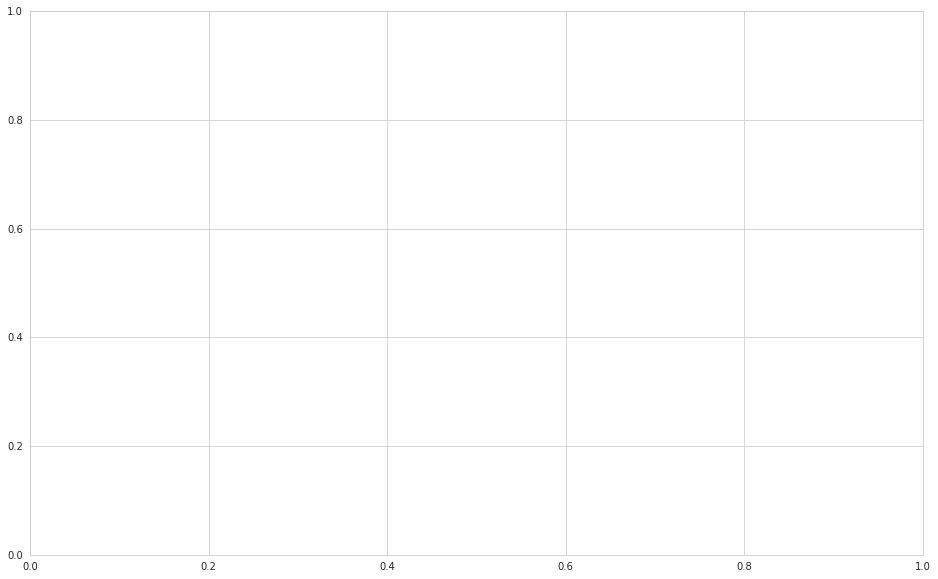

In [ ]:
sns.set_style("whitegrid")
plt.rc('legend', fontsize=15)
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x='Channel', y='Conversion', data=df_sample_submissions)
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

**model_rf**

In [ ]:
y_scores_rf = y_valid_pred_rf
fpr_rf, tpr_rf, _ = roc_curve(y_valid, y_scores_gb)
roc_auc_rf = auc(fpr_rf, tpr_rf)

print("Area under ROC curve = {:0.2f}".format(roc_auc_rf))

NameError: ignored

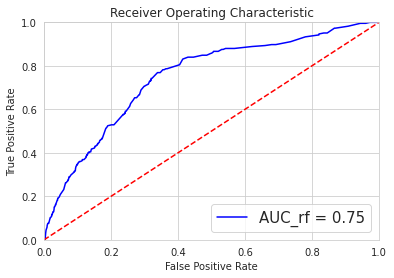

In [ ]:
import sklearn.metrics as metrics
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC_rf = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**model_gbm**

In [ ]:
y_scores_gbm = y_valid_pred_gbm
fpr_gbm, tpr_gbm, _ = roc_curve(y_valid, y_scores_gb)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gbm))

NameError: ignored

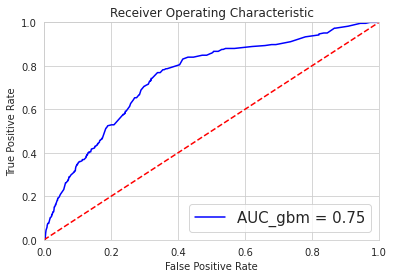

In [ ]:
import sklearn.metrics as metrics
roc_auc_gbm = metrics.auc(fpr_gbm, tpr_gbm)
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC_gbm = %0.2f' % roc_auc_gbm )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_scores_gb = model_gbm.decision_function(X_valid)
fpr_gb, tpr_gb, _ = roc_curve(y_valid, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))